<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/sq_ex_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import os
import pandas as pd

In [3]:
import pandas as pd
train_dir = '/content/drive/MyDrive/small_data/train'
df = pd.read_csv('/content/drive/MyDrive/small_data/train_csv1.csv')

In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [5]:
X_train = []
y_age = []
y_gender = []

#df = pd.read_csv('/raid/chenchao/code/BoneAge/BoneAge/data/Training.csv')
a = df.values
m = a.shape[0]

path = train_dir
k = 0
print ('Loading data set...')
k=1
for i in os.listdir(path):
  #print(i)
  if(len(i)>9):   #errror occuring  so to 
    continue
  y_age.append(df.boneage[df.id == int(i[:-4])].tolist()[0])
  a = df.male[df.id == int(i[:-4])].tolist()[0]
  if a:
    y_gender.append(1)
  else:
     y_gender.append(0)
  img_path = path + "/"+i
  img = cv2.imread(img_path)
  #print(img.shape)
  #print (img_path)
  img = cv2.imread(img_path)
    #print (img_path)
    #if(img is not None):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(300,300))
  x = np.asarray(img, dtype=np.uint8)
  X_train.append(x)

Loading data set...


In [6]:
def softlabel(label,num_class):
    softlabel=np.zeros((len(label),num_class))
    ratio = 1.0/50
    for i in range(len(label)):
        for j in range(num_class):
            softlabel[i,j]=1.0 - ratio*np.abs(j-label[i])
    softlabel = np.maximum(softlabel,0)
    return softlabel

In [7]:
y = np.asarray(y_age)
gender = np.asarray(y_gender)
x=np.asarray(X_train, dtype=np.float32)
x/255
gender =2*( gender-0.5)
x_final = []
y_final = []
gender_final = []

# Shuffle images and split into train, validation and test sets
#random_no = np.random.choice(x.shape[0], size=x.shape[0], replace=False)
random_no = np.arange(x.shape[0])
#print(random_no)
np.random.seed(0)
np.random.shuffle(random_no)
for i in random_no:
    x_final.append(x[i,:,:,:])
    y_final.append(y[i])
    gender_final.append(gender[i])

x_final = np.asarray(x_final)
y_final = np.asarray(y_final)
gender_final = np.asarray(gender_final)
print (y_final[:50])
print (gender_final[:50])
k = 10 # Decides split count
x_test = x_final[:k,:,:,:]
y_test = y_final[:k]
gender_test = gender_final[:k]
x_valid = x_final[k:2*k,:,:,:]
y_valid = y_final[k:2*k]
gender_valid = gender_final[k:2*k]
x_train = x_final[2*k:,:,:,:]
y_train = y_final[2*k:]
gender_train = gender_final[2*k:]

## 
#y_test = keras.utils.to_categorical(y_test,240)
#y_train = keras.utils.to_categorical(y_train,240)
#y_valid = keras.utils.to_categorical(y_valid,240)
y_train = softlabel(y_train,240)
y_valid = softlabel(y_valid,240)
y_test = softlabel(y_test,240)
print (y_train)


print ('x_train shape:'+ str(x_train.shape))
print ('y_train shape:'+ str(y_train.shape))
print ('gender_train shape:'+ str(gender_train.shape))
print ('x_valid shape:'+ str(x_valid.shape))
print ('y_valid shape:'+ str(y_valid.shape))
print ('gender_valid shape:' + str(gender_valid.shape))
print ('x_test shape:'+ str(x_test.shape))
print ('y_test shape:'+ str(y_test.shape))


[ 30 149 113 132  33 136 150  94  24  32  60 126  88 174  78  42  21  21
  54  82 192  24  94  32 156 120 165  33 138 156  27 108  42 162  57 126
   4 156 180  88  36 180 132 156 120  60  90 138 138 120]
[-1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.]
[[0.   0.   0.   ... 0.1  0.08 0.06]
 [0.52 0.54 0.56 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.02 0.04 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
x_train shape:(51, 300, 300, 3)
y_train shape:(51, 240)
gender_train shape:(51,)
x_valid shape:(10, 300, 300, 3)
y_valid shape:(10, 240)
gender_valid shape:(10,)
x_test shape:(10, 300, 300, 3)
y_test shape:(10, 240)


In [8]:
!pip install visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 36.6 MB/s 
     |████████████████████████████████| 663 kB 68.4 MB/s 
     |████████████████████████████████| 116 kB 65.5 MB/s 
     |████████████████████████████████| 115 kB 72.4 MB/s 
     |████████████████████████████████| 109 kB 52.7 MB/s 
     |████████████████████████████████| 978 kB 65.7 MB/s 
     |████████████████████████████████| 966 kB 32.4 MB/s 
     |████████████████████████████████| 2.2 MB 54.3 MB/s 
     |████████████████████████████████| 500 kB 65.1 MB/s 
     |████████████████████████████████| 1.1 MB 57.7 MB/s 
     |████████████████████████████████| 107 kB 71.9 MB/s 
     |████████████████████████████████| 212 kB 68.0 MB/s 
     |████████████████████████████████| 98 kB 8.0 MB/s 
     |████████████████████████████████| 1.0 MB 63.9 MB/s 
     |████████████████████████████████| 40 kB 6.5 MB/s 
  Created wheel for PyOpenGL: filen

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os

In [21]:
input = Input(shape=(300,300,3),name='input1')

#inizio blocco 1
x = keras.layers.Conv2D(filters=16, kernel_size=[1, 1], padding='same')(input)
block = keras.layers.Conv2D(filters=16, kernel_size=[3, 3], padding="same")(x)
block = keras.layers.BatchNormalization()(block)
block = keras.layers.Activation("relu")(block)
block = keras.layers.Conv2D(filters=16, kernel_size=[3, 3], padding="same")(block)

#inio Squeeze and Excitation 1
sq = keras.layers.GlobalAveragePooling2D()(block)
sq = keras.layers.Reshape((1,1,16))(sq)
sq = keras.layers.Dense(units=16,activation="sigmoid")(sq)
block = keras.layers.multiply([block,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([x,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)



#fine blocco 1
#inizio blocco 2
x = keras.layers.Conv2D(filters=32, kernel_size=[1, 1], padding='same')(net)
block = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding="same")(x)
block = keras.layers.BatchNormalization()(block)
block = keras.layers.Activation("relu")(block)
block = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding="same")(block)

#inio Squeeze and Excitation 2
sq = keras.layers.GlobalAveragePooling2D()(block)
sq = keras.layers.Reshape((1,1,32))(sq)
sq = keras.layers.Dense(units=32,activation="sigmoid")(sq)
block = keras.layers.multiply([block,sq])
#fine Squeeze and Excitation 2


net = keras.layers.add([x,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_2")(net)
#fine blocco 2
#inizio blocco 3
x = keras.layers.Conv2D(filters=64, kernel_size=[1, 1], padding='same')(net)
block = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding="same")(x)
block = keras.layers.BatchNormalization()(block)
block = keras.layers.Activation("relu")(block)
block = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding="same")(block)

#inio Squeeze and Excitation 3
sq = keras.layers.GlobalAveragePooling2D()(block)
sq = keras.layers.Reshape((1,1,64))(sq)
sq = keras.layers.Dense(units=64,activation="sigmoid")(sq)
block = keras.layers.multiply([block,sq])
#fine Squeeze and Excitation 3

net = keras.layers.add([x,block])
net = keras.layers.Activation("relu", name="block_3")(net)



net = keras.layers.BatchNormalization()(net)
net = keras.layers.Dropout(0.25)(net)

net = keras.layers.GlobalAveragePooling2D()(net)
input_gender = Input(shape=(1,),dtype='float32',name='input2')
gender_embedding=Dense(16)(input_gender)
x=Flatten()(net)
f = keras.layers.Concatenate(axis=1)([net,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(240)(f)

model = keras.models.Model(inputs=[input,input_gender], outputs=predictions)

model.summary()
print(model.summary())


(None, 80)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 300, 300, 16  64          ['input1[0][0]']                 
                                )                                                                 
                                                                                                  
 conv2d_37 (Conv2D)             (None, 300, 300, 16  2320        ['conv2d_36[0][0]']              
                                )                                                

In [22]:
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])

# Save weights after every epoch
#dr='/content/drive/MyDrive/Colab Notebooks/weights'
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=100,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
2/2 [==============================] - 2s 584ms/step - loss: 0.3537 - MAE: 0.3537 - val_loss: 4.3243 - val_MAE: 4.3243
Epoch 2/100
2/2 [==============================] - 0s 223ms/step - loss: 0.3344 - MAE: 0.3344 - val_loss: 3.0467 - val_MAE: 3.0467
Epoch 3/100
2/2 [==============================] - 0s 227ms/step - loss: 0.3233 - MAE: 0.3233 - val_loss: 2.4235 - val_MAE: 2.4235
Epoch 4/100
2/2 [==============================] - 0s 224ms/step - loss: 0.3154 - MAE: 0.3154 - val_loss: 2.0230 - val_MAE: 2.0230
Epoch 5/100
2/2 [==============================] - 1s 246ms/step - loss: 0.3079 - MAE: 0.3079 - val_loss: 1.7589 - val_MAE: 1.7589
Epoch 6/100
2/2 [==============================] - 1s 238ms/step - loss: 0.3012 - MAE: 0.3012 - val_loss: 1.5538 - val_MAE: 1.5538
Epoch 7/100
2/2 [==============================] - 1s 242ms/step - loss: 0.2961 - MAE: 0.2961 - val_loss: 1.3988 - val_MAE: 1.3988
Epoch 8/100
2/2 [==============================] - 1s 241ms/step - loss: 0.2904 - M

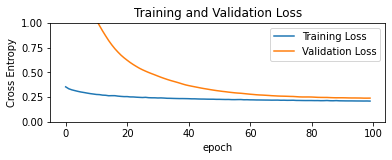

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

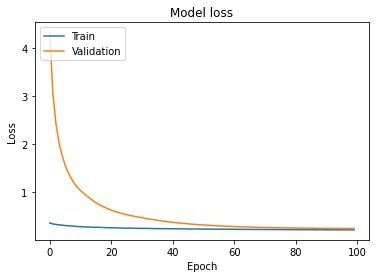

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()